## 1 - BUSINESS UNDERSTANDING

The objective of this project is to analyze a dataset related to social media activity and mental health in order to build a predictive model that can classify whether an individual is at risk for depression. 
Depression is one of the leading causes of disability globally and early identification of those at risk can have a significant impact in terms of prevention and psychological support.

The "smmh.csv" dataset contains demographic information, social media habits (time of use, type of platforms used) and indicators related to mental health. 
The goal is to build a machine learning model that, based on this data, can predict the risk of depression, helping to identify useful patterns for prevention.

The main questions we want to answer are:
- Is it possible to predict the risk of depression based on the use of social media?
- Which variables have a more relevant predictive role?
- What is the performance of the model on test data?

In [83]:
# Importing necessary libraries for data handling, visualization, and modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2 - DATA UNDERSTANDING

Collect initial data

In [84]:
# Read csv file
df = pd.read_csv("smmh.csv")

Describe data

In [85]:
# Display the first five rows of the dataset to examine the structure and values
df.head(n=5)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Explore data

In [86]:
# Describe
df.describe(include='all')

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
count,481,481.00000,481,481,481,451,481,481,481,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
unique,480,NaN,9,4,4,18,2,125,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,5/11/2022 22:54:32,NaN,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,263,285,292,239,478,35,116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,26.13659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.553015,...,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,NaN,9.91511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.096299,...,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,NaN,13.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,21.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,...,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,NaN,22.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,NaN,26.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [88]:
# Check duplicate row
df[df.duplicated(keep=False)]

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"


In [89]:
# Check outlier
from scipy import stats
z_thr = 3.0
df[(np.abs(stats.zscore(df.select_dtypes(include=int))) > z_thr).any(axis=1)]

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"


In [90]:
# Check missing data
df.isnull().sum()

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

# 3 - DATA PREPARATION

Select and clean data

In [91]:
# Remove unnncesary columns
df.drop(labels=["Timestamp"], axis=1, inplace=True)

In [92]:
# Rename columns
col_rename = {
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship',
    '4. Occupation Status': 'occupation',
    '5. What type of organizations are you affiliated with?': 'affiliate_organization',
    '6. Do you use social media?': 'social_media_use',
    '7. What social media platforms do you commonly use?': 'platforms',
    '8. What is the average time you spend on social media every day?': 'avg_time_per_day',
    '9. How often do you find yourself using Social media without a specific purpose?': 'without_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless',
    '12. On a scale of 1 to 5, how easily distracted are you?' : 'distracted_ease',
    '13. On a scale of 1 to 5, how much are you bothered by worries?' : 'worries',
    '14. Do you find it difficult to concentrate on things?' : 'concentration',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?' : 'compare_to_others',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?' : 'compare_feelings',
    '17. How often do you look to seek validation from features of social media?' : 'validation',
    '18. How often do you feel depressed or down?' : 'depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?' : 'daily_activity_flux',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?' : 'sleeping_issues'
}
df.rename(columns=col_rename, inplace=True)
df

,age,gender,relationship,occupation,affiliate_organization,social_media_use,platforms,avg_time_per_day,without_purpose,distracted,restless,distracted_ease,worries,concentration,compare_to_others,compare_feelings,validation,depressed,daily_activity_flux,sleeping_issues
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4


There are some missing values in *Affiliate_organization* (451 < 481). There are 30 NaN values in one single column.

30 on 481 = 6,24% => I fill the NaN values with the most common category for the column *Affiliate_organization*

In [93]:
df.affiliate_organization.fillna(df['affiliate_organization'].value_counts().index[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     481 non-null    float64
 1   gender                  481 non-null    object 
 2   relationship            481 non-null    object 
 3   occupation              481 non-null    object 
 4   affiliate_organization  481 non-null    object 
 5   social_media_use        481 non-null    object 
 6   platforms               481 non-null    object 
 7   avg_time_per_day        481 non-null    object 
 8   without_purpose         481 non-null    int64  
 9   distracted              481 non-null    int64  
 10  restless                481 non-null    int64  
 11  distracted_ease         481 non-null    int64  
 12  worries                 481 non-null    int64  
 13  concentration           481 non-null    int64  
 14  compare_to_others       481 non-null    in

C:\Users\uns01931\AppData\Local\Temp\ipykernel_6360\2503012962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.affiliate_organization.fillna(df['affiliate_organization'].value_counts().index[0], inplace=True)


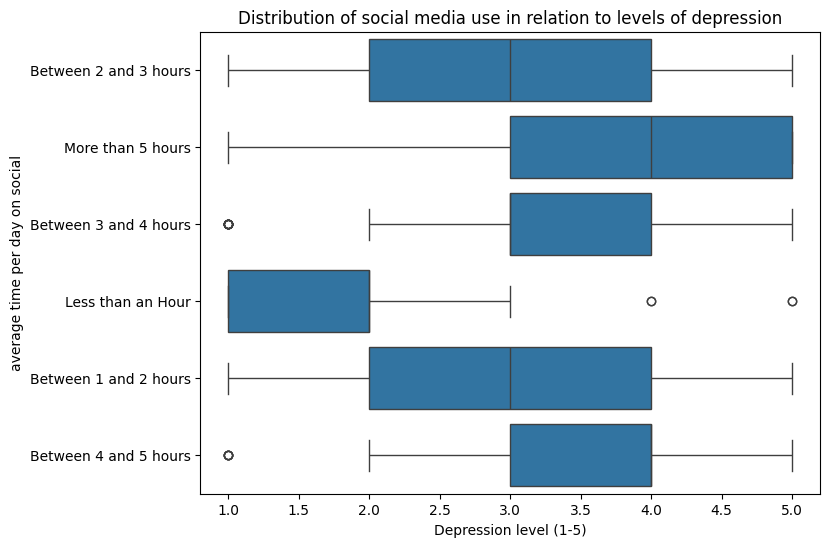

In [94]:
plt.figure(figsize=(8,6))
sns.boxplot(x='depressed', y='avg_time_per_day', data=df)
plt.title("Distribution of social media use in relation to levels of depression")
plt.xlabel("Depression level (1-5)")
plt.ylabel("average time per day on social")
plt.show()

In [95]:
df.relationship.value_counts()

relationship
Single               285
Married              101
In a relationship     88
Divorced               7
Name: count, dtype: int64

In [96]:
df.occupation.value_counts()
df.affiliate_organization.value_counts()
df.gender.value_counts()

gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

In [97]:
# Reducing the different values for column "gender"
df.gender = df.gender.apply(lambda x: x if x in ["Male","Female"] else "other")
df.gender.value_counts()

gender
Female    263
Male      211
other       7
Name: count, dtype: int64

The "gender" column now contains three categories: "Female", "Male", and "Other". 

To avoid introducing an artificial numerical order, One-Hot Encoding was applied, creating separate binary columns for each gender category.

 This ensures that tree-based models can handle the variable correctly without assuming any ordinal relationship between the categories.


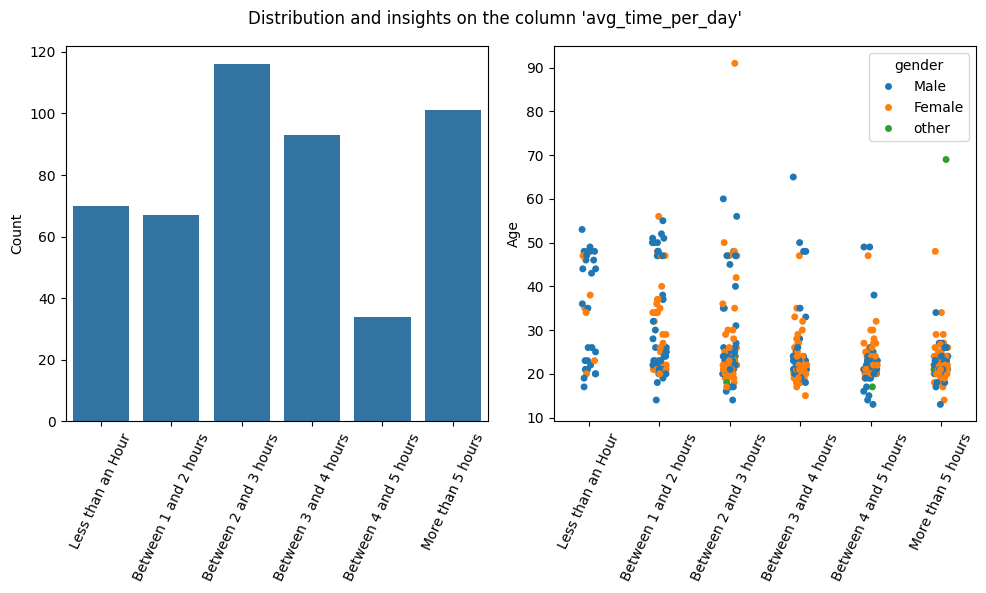

In [98]:
orderlist = ['Less than an Hour', 'Between 1 and 2 hours', 'Between 2 and 3 hours',
         'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours']

fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.barplot(x=df.avg_time_per_day.unique(), y=df.avg_time_per_day.value_counts(), ax=ax[0], order=orderlist)
ax[1] = sns.stripplot(data=df, x=df.avg_time_per_day, y=df.age, hue="gender", order=orderlist)
fig.suptitle("Distribution and insights on the column 'avg_time_per_day'")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count")
ax[1].set_xlabel("")
ax[1].set_ylabel("Age")
ax[0].tick_params(axis='x', rotation=65)
ax[1].tick_params(axis='x', rotation=65)
plt.tight_layout()

In [99]:
# Add column with hours 
type_of_answ=[]
for i in df["avg_time_per_day"]:
    if(i not in type_of_answ):
        type_of_answ.append(i)
type_of_answ = ['Between 2 and 3 hours','More than 5 hours','Between 3 and 4 hours','Less than an Hour','Between 1 and 2 hours','Between 4 and 5 hours']

avgHours=[]
for i in df["avg_time_per_day"]:
    if(i == type_of_answ[0]):
        avgHours.append(2.5)
    elif(i == type_of_answ[1]):
        avgHours.append(5.5)
    elif(i == type_of_answ[2]):
        avgHours.append(3.5)
    elif(i == type_of_answ[3]):
        avgHours.append(0.5)
    elif(i == type_of_answ[4]):
        avgHours.append(1.5)
    else: #(i == type_of_answ[5]):
        avgHours.append(4.5)
df["avg hours"] = avgHours

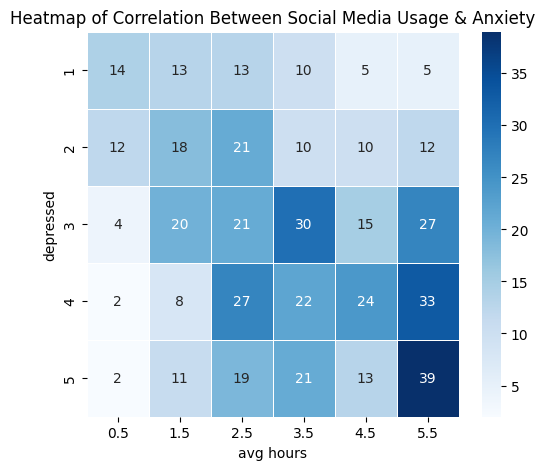

In [100]:
# Select two columns
columnH = "avg hours"
columnDep = "depressed"

# Compute correlation matrix for just these two columns
heatmap_data = pd.crosstab(df[columnDep], df[columnH])

# Plot the heatmap
plt.figure(figsize=(6, 5))  # Set figure size
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt="d", linewidths=0.5)

# Title
plt.title("Heatmap of Correlation Between Social Media Usage & Anxiety")
plt.show()

Feature engineering

In [101]:
# Creation of binary target
# Considering as "at risk" people with depression score >= 3
df["risk"] = df["depressed"].apply(lambda x: 1 if x >= 3 else 0)
df["high_usage"] = df["avg hours"].apply(lambda x: 1 if x in ["More than 3 hours", "Between 2 and 3 hours"] else 0)
df["mental_fatigue"] = df[["distracted", "restless", "worries"]].mean(axis=1)
df["age_group"] = pd.cut(df["age"], bins=[0, 18, 25, 35, 50, 100], labels=["<18", "18-25", "26-35", "36-50", "50+"])

Preprocessing

In [102]:
# Preparation of X and y
X = df.drop(columns=["depressed", "risk", "platforms"])
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding
y = df["risk"]

In [103]:
# Train-test split (80% train, 20% test, stratified to maintain proportion classes)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Feature selection with Random Forest

In [104]:
# Preliminary model to determine important characteristics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf_selector = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_selector.fit(X_train, y_train)

# Selection of features with importance > threshold
sfm = SelectFromModel(rf_selector, threshold="median")
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Selected features

selected_features = X_train.columns[sfm.get_support()]
print("Selected features:", list(selected_features))

Selected features: ['age', 'without_purpose', 'distracted', 'restless', 'distracted_ease', 'worries', 'concentration', 'compare_to_others', 'compare_feelings', 'validation', 'daily_activity_flux', 'sleeping_issues', 'avg hours', 'mental_fatigue', 'gender_Male', 'relationship_In a relationship', 'relationship_Married', 'relationship_Single', 'occupation_Salaried Worker', 'occupation_University Student', 'affiliate_organization_University', 'avg_time_per_day_Between 2 and 3 hours', 'avg_time_per_day_Between 3 and 4 hours', 'avg_time_per_day_More than 5 hours', 'age_group_18-25']


c:\Users\uns01931\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\uns01931\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# 4 - MODELING

The objective is to build a predictive model that can classify whether an individual is at risk of depression. 

Random Forest is chosen for its robustness and ability to handle mixed data types. 
Decision Tree offers interpretability and rule extraction capabilities.


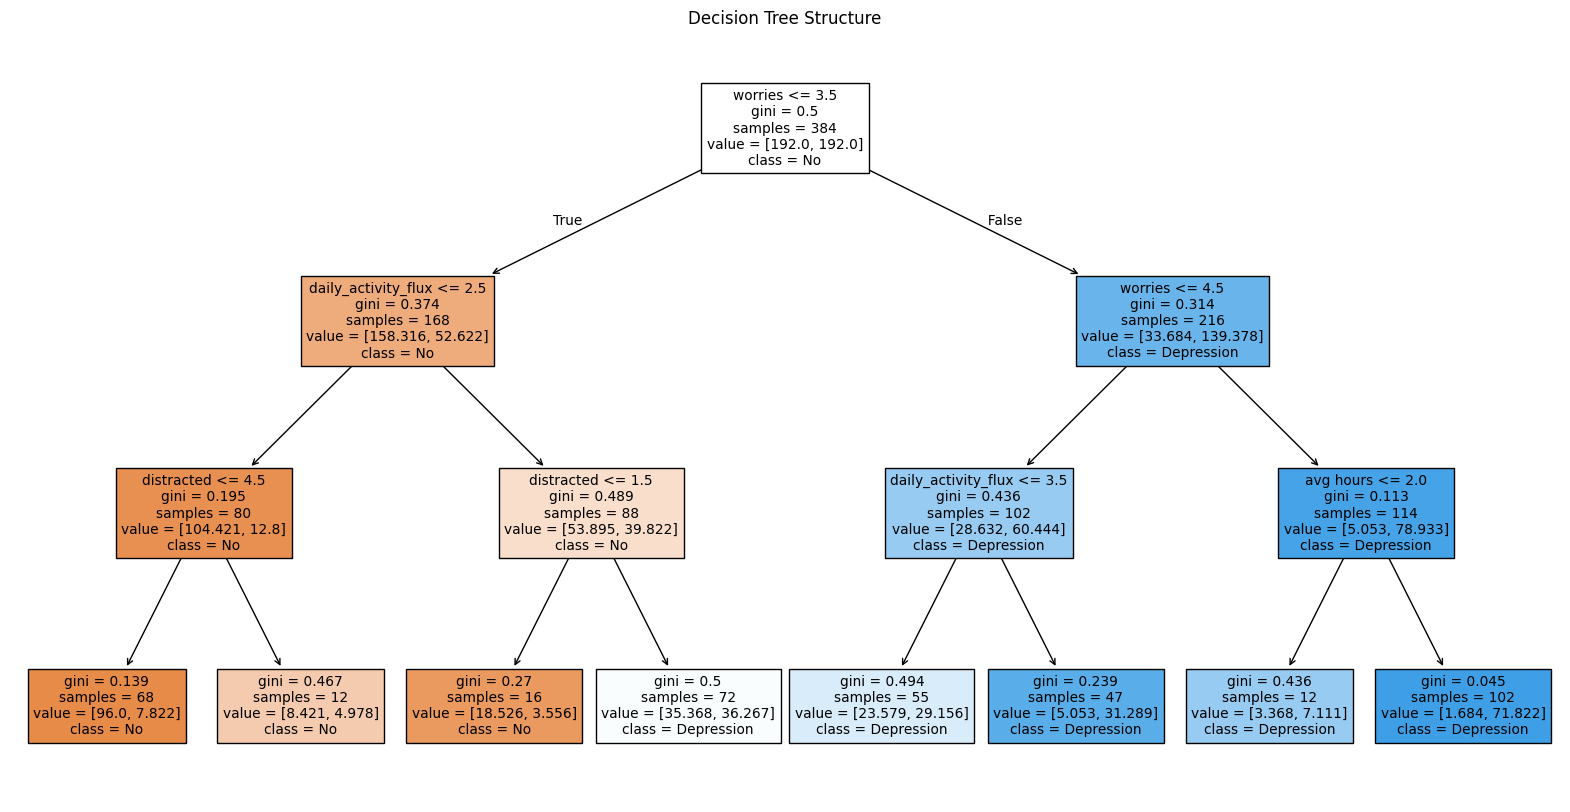

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Hyperparameter Tuning - Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Use GridSearchCV to find the best hyperparameters based on ROC AUC
rf_search = GridSearchCV(rf_model, rf_grid, scoring='roc_auc', cv=5)
rf_search.fit(X_train_selected, y_train)
best_rf = rf_search.best_estimator_

# Train a Decision Tree with limited depth for interpretability
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')

# Model fit
dt_model.fit(X_train_selected, y_train)


# Decision tree visualization
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=selected_features, class_names=['No', 'Depression'], filled=True)
plt.title("Decision Tree Structure")
plt.show()

## 5 - EVALUATION

The models are evaluated using various metrics: accuracy, precision, recall, F1-score, ROC AUC, and confusion matrix. 

This allows a comprehensive understanding of each model's performance.



Random Forest - Confusion Matrix:
[[15 14]
 [ 8 60]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        29
           1       0.81      0.88      0.85        68

    accuracy                           0.77        97
   macro avg       0.73      0.70      0.71        97
weighted avg       0.76      0.77      0.76        97

Random Forest - ROC AUC Score: 0.84

Decision Tree - Confusion Matrix:
[[14 15]
 [ 6 62]]

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.48      0.57        29
           1       0.81      0.91      0.86        68

    accuracy                           0.78        97
   macro avg       0.75      0.70      0.71        97
weighted avg       0.77      0.78      0.77        97

Decision Tree - ROC AUC Score: 0.85


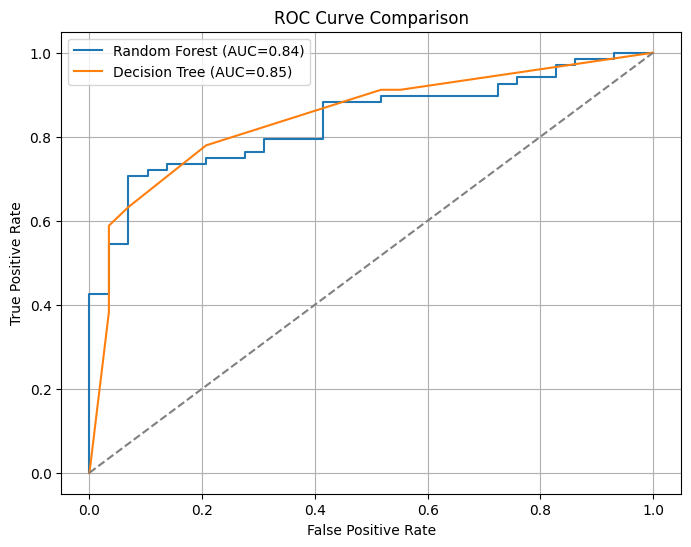

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n{name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"{name} - ROC AUC Score: {roc_auc:.2f}")
    return roc_auc, y_prob

roc_rf, y_prob_rf = evaluate_model("Random Forest", best_rf, X_test_selected, y_test)
roc_dt, y_prob_dt = evaluate_model("Decision Tree", dt_model, X_test_selected, y_test)

# ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_rf:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={roc_dt:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()